#### 1. Preparar el ambiente de trabajo

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

warnings.filterwarnings(action='ignore')
plt.style.use('seaborn')

df = pd.read_csv('boston.csv').drop(['Unnamed: 0'],axis=1)
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
#Medidas descriptivas
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### 2. Dividir la muestra

In [6]:
x_mat = df.loc[:, df.columns != 'medv']
y_vec = df.loc[:, 'medv']

x_train, x_test, y_train, y_test = train_test_split(x_mat, y_vec, test_size=.33, random_state=18576)

#### 3. Generar modelos

In [7]:
#Modelo sin intercepto
modelo_sinint = linear_model.LinearRegression(fit_intercept=False)
modelo_sinint.fit(x_train, y_train)
modelo_sinint_yhat = modelo_sinint.predict(x_test)

In [8]:
#Modelo con intercepto
modelo_conint = linear_model.LinearRegression(fit_intercept=True)
modelo_conint.fit(x_train, y_train)
modelo_conint_yhat = modelo_conint.predict(x_test)

#### 4. Obtención de métricas

In [9]:
def report_scores(predict,test):
    mse = mean_squared_error(test,predict).round(0)
    r2 = r2_score(test,predict).round(2)
    plt.subplot(2,1,1)
    plt.barh(['Promedio Error Cuadratico'],[mse])
    #plt.title("Promedio Error Cuadrático")
    plt.subplot(2,1,2)
    plt.barh(['R cuadrado'],[r2])
    #plt.title("R cuadrado")
    plt.tight_layout()
    return mse,r2

(18.0, 0.69)

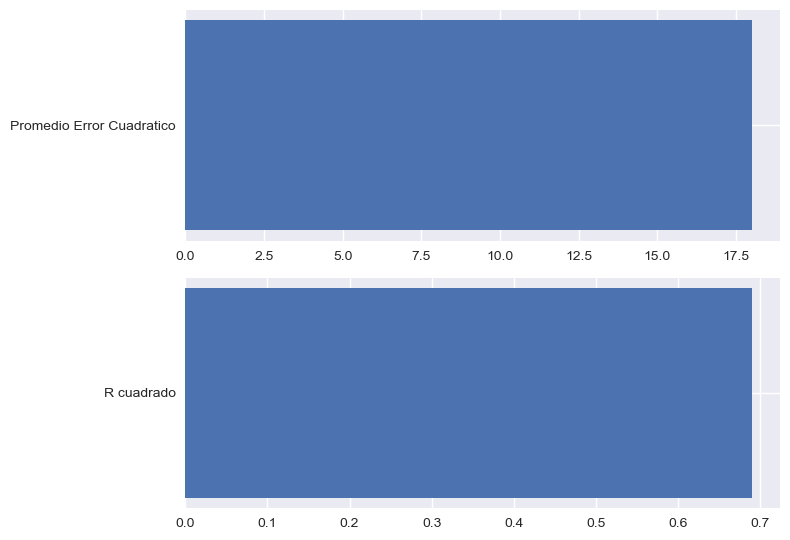

In [10]:
# Modelo sin intercepto
report_scores(modelo_sinint_yhat,y_test)

(19.0, 0.68)

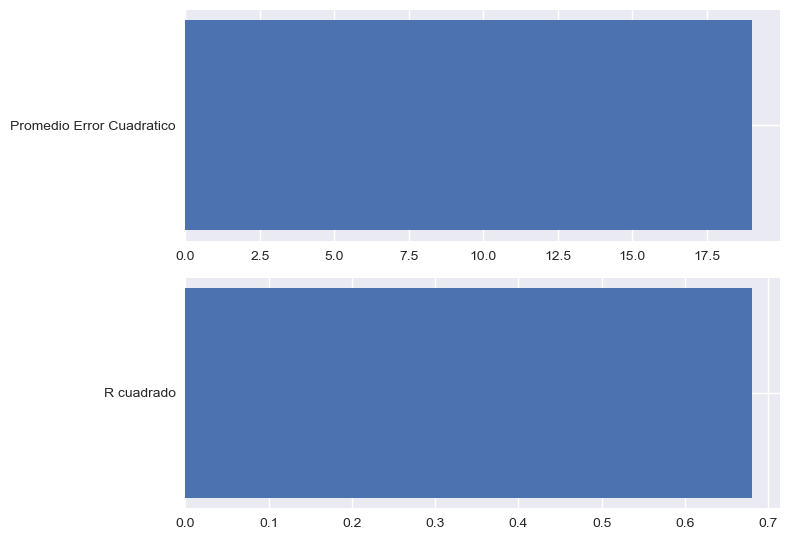

In [11]:
# Modelo con intercepto
report_scores(modelo_conint_yhat,y_test)

- Podemos preferir el primer modelo sin intercepto si consideramos el promedio del error cuadrático. Además, de igual manera podemos preferir el primer modelo si consideramos el R cuadrado.

#### 5. Refactorización del modelo

In [43]:
def fetch_features(df,y_vec='medv'):
    return df.corr()[y_vec].sort_values(ascending=False)

In [44]:
fetch_features(df,'medv')

medv       1.000000
rm         0.695360
zn         0.360445
black      0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64

Los 6 atributos con una mayor correlación son:
- lstat: Porcentaje de población de estratos bajos
- rm: Cantidad promedio de habitaciones por casa
- ptratio: Razón alumno:profesor por sector de Boston
- indus: Proporción de negocios no asociados al comercio por sector
- tax: Nivel de impuestos asociados a viviendas
- nox: Concentración de dióxido de carbono

#### 6. Refactorización del modelo predictivo

In [71]:
x_mat = df.loc[:,['lstat','rm','ptratio','indus','tax','nox']]
y_vec = df.loc[:,'medv']

x_train, x_test, y_train, y_test = train_test_split(x_mat, y_vec, test_size=.33, random_state=18576)

In [76]:
modelo = linear_model.LinearRegression(fit_intercept=False)
modelo.fit(x_train, y_train)
modelo_yhat = modelo.predict(x_test)

(17.0, 0.71)

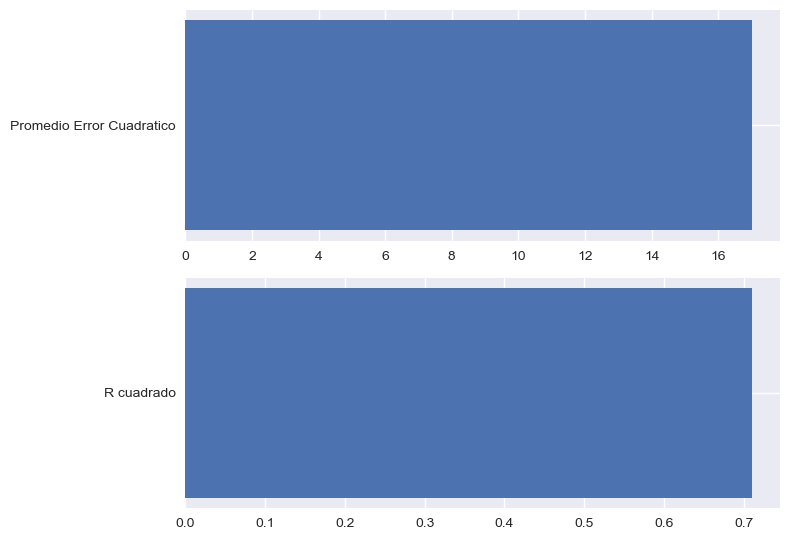

In [77]:
report_scores(modelo_yhat,y_test)

- En base al promedio error cuadratico (17) y al R cuadrado (0.71) podemos mencionar que el primer modelo sin intercepto con todos los atributos de la base de datos es muy similar a este modelo pero el último tiene mejor desempeño.

#### 7. Predicción de casos

In [88]:
worst_neighbor = np.array([37.9,12.6,3.5,27.7,187,0.87]).reshape(1,-1)
best_neighbor = np.array([1.73,22,8.7,0.46,711,0.38]).reshape(1,-1)

modelo_yhat_worst = modelo.predict(worst_neighbor)
modelo_yhat_best = modelo.predict(best_neighbor)

print(f'El modelo con el peor escenario posible entrega una predicción de {modelo_yhat_worst.round(1)}')
print(f'El modelo con el mejor escenario posible entrega una predicción de {modelo_yhat_best.round(1)}')

El modelo con el peor escenario posible entrega una predicción de [57.5]
El modelo con el mejor escenario posible entrega una predicción de [123.4]
